In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
df = pd.read_csv("fiehnlib_4_classes.csv", index_col=[0], encoding="utf-8")
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]
def split(df, test_size=0.25, seed=0):
    np.random.seed(seed)
    train = pd.DataFrame()
    test = pd.DataFrame()
    ind = set(df.index)
    ind_train = []
    names = list(df.Name)
    while len(train)<=len(df)*(1-test_size):
        name = np.random.choice(names)
        names = remove_values_from_list(names, name)
        added = df[df.Name==name]
        ind_train.extend(list(added.index))
        train = pd.concat([train, added])
    test_ind = list(ind-set(ind_train))
    test = df.iloc[test_ind, :]
    X_train, X_test, y_train, y_test = train.loc[:, :"500"], test.loc[:, :"500"], train.TMS, test.TMS
    return X_train, X_test, y_train, y_test
train_test = [
    split(df,test_size=0.25,seed=i) for i in range(3)
]
def return_best_model(clf, param):
    df = pd.DataFrame(clf.cv_results_)
    max_score = max(df.mean_test_score)
    info =  df[abs(df.mean_test_score-max_score)<0.003*param].iloc[0, :]
    return info.param_n_estimators, info.mean_test_score
def plot_conf_matrix(clf):
    for seed in range(3):
        X_train, X_test, y_train, y_test = train_test[seed]
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1','actual 2', 'actual 3'], columns = ['predicted 0', 'predicted 1','predicted 2', 'predicted 3'])
        display(conf_matrix)

In [21]:
for i in range(3):
    X_train, X_test, y_train, y_test = train_test[i]
    print(f"{i}: {RandomForestClassifier(random_state=0, n_estimators=250).fit(X_train, y_train).score(X_test, y_test)}")

0: 0.8362282878411911
1: 0.8635235732009926
2: 0.8511166253101737


<AxesSubplot:xlabel='param_n_estimators'>

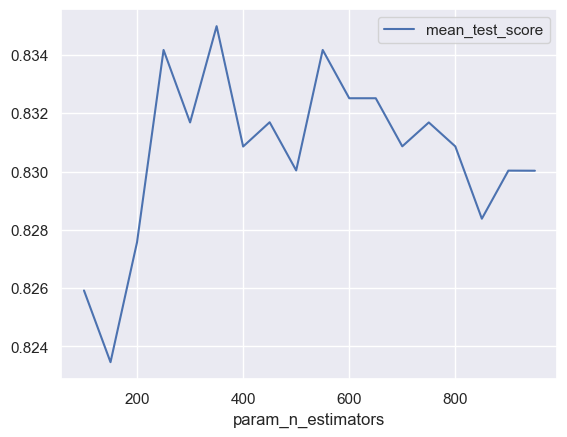

In [12]:
seed=0
X_train, X_test, y_train, y_test = train_test[seed]
n_estimators = range(100,1000,50)
params = {"n_estimators":n_estimators}
gs = GridSearchCV(RandomForestClassifier(random_state=0), params)
gs.fit(X_train, y_train)
gs_res = pd.DataFrame(gs.cv_results_)
sns.set_theme()
gs_res.plot(x="param_n_estimators", y = "mean_test_score")

<AxesSubplot:xlabel='param_n_estimators'>

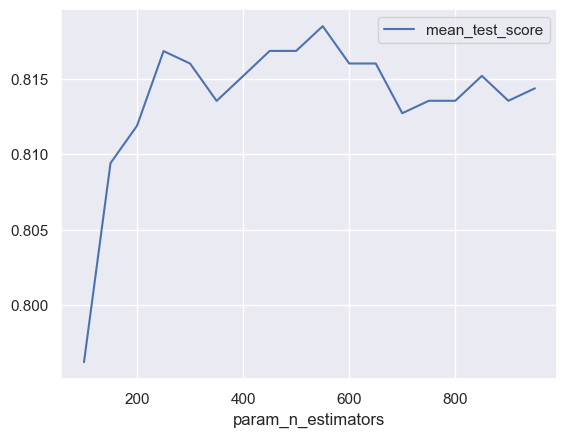

In [13]:
seed=1
X_train, X_test, y_train, y_test = train_test[seed]
n_estimators = range(100,1000,50)
params = {"n_estimators":n_estimators}
gs = GridSearchCV(RandomForestClassifier(random_state=0), params)
gs.fit(X_train, y_train)
gs_1_res = pd.DataFrame(gs.cv_results_)
sns.set_theme()
gs_1_res.plot(x="param_n_estimators", y = "mean_test_score")

<AxesSubplot:xlabel='param_n_estimators'>

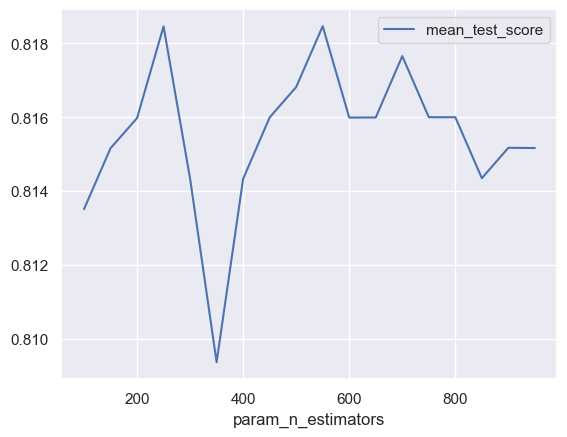

In [14]:
seed=2
X_train, X_test, y_train, y_test = train_test[seed]
n_estimators = range(100,1000,50)
params = {"n_estimators":n_estimators}
gs = GridSearchCV(RandomForestClassifier(random_state=0), params)
gs.fit(X_train, y_train)
gs_2_res = pd.DataFrame(gs.cv_results_)
sns.set_theme()
gs_2_res.plot(x="param_n_estimators", y = "mean_test_score")

In [20]:
plot_conf_matrix(RandomForestClassifier(random_state=0, n_estimators=250))

,predicted 0,predicted 1,predicted 2,predicted 3
actual 0,58,14,4,0
actual 1,9,64,7,1
actual 2,3,3,77,15
actual 3,0,2,8,138


,predicted 0,predicted 1,predicted 2,predicted 3
actual 0,48,6,2,0
actual 1,4,65,8,1
actual 2,3,11,99,14
actual 3,0,2,4,136


,predicted 0,predicted 1,predicted 2,predicted 3
actual 0,62,12,3,1
actual 1,7,59,7,0
actual 2,1,1,92,17
actual 3,0,3,8,130
